In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
df=pd.read_csv(r"WineQT.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.shape

(1143, 13)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [9]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


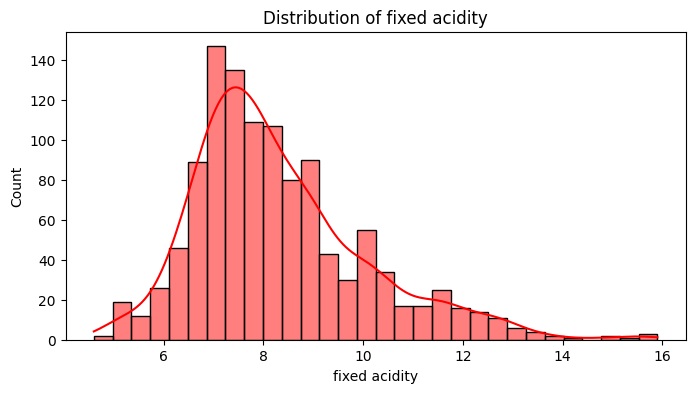

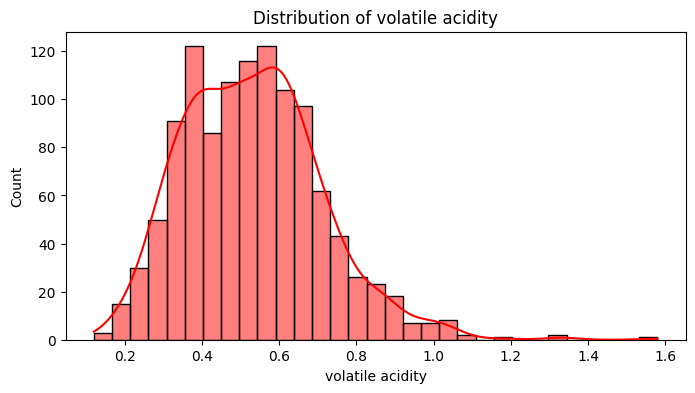

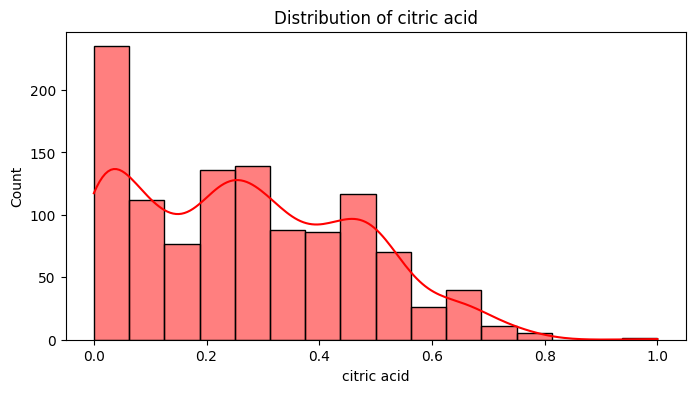

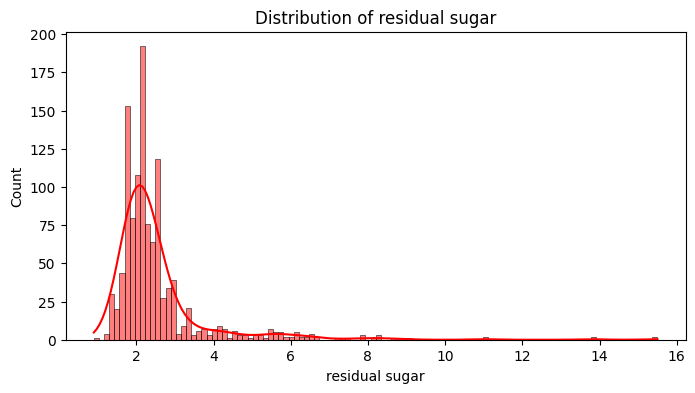

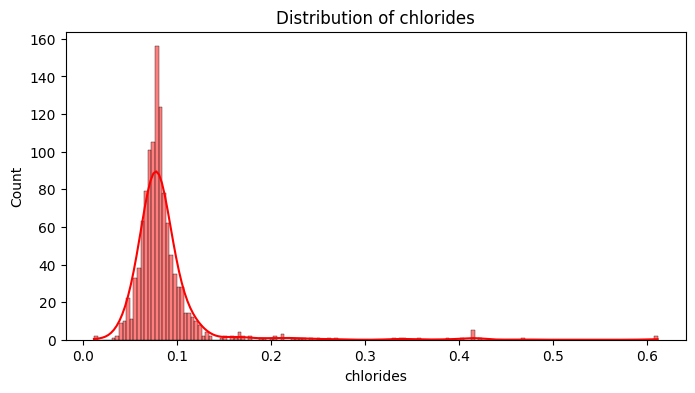

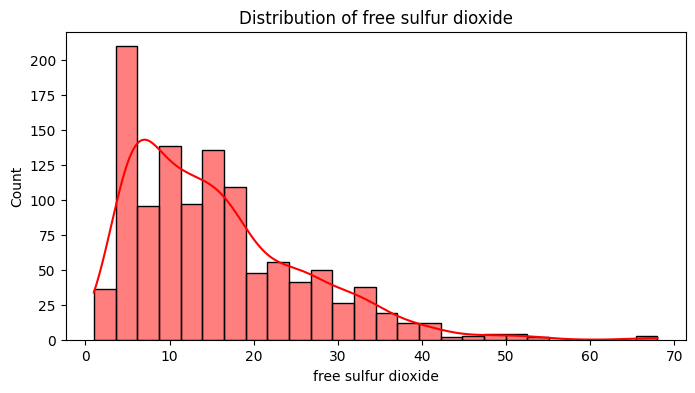

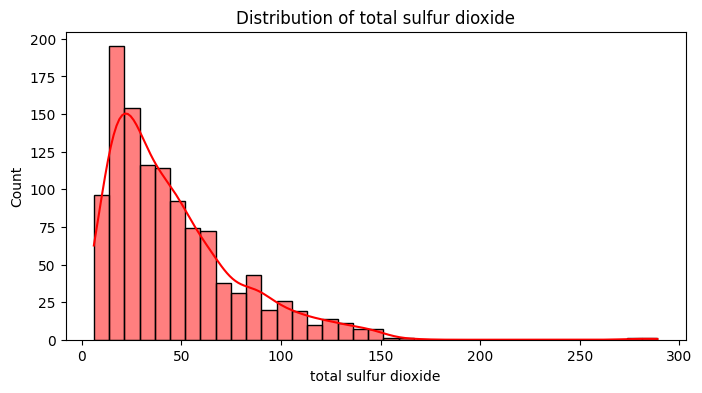

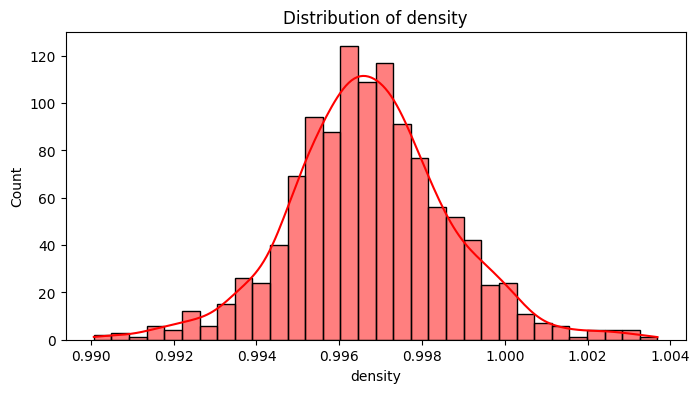

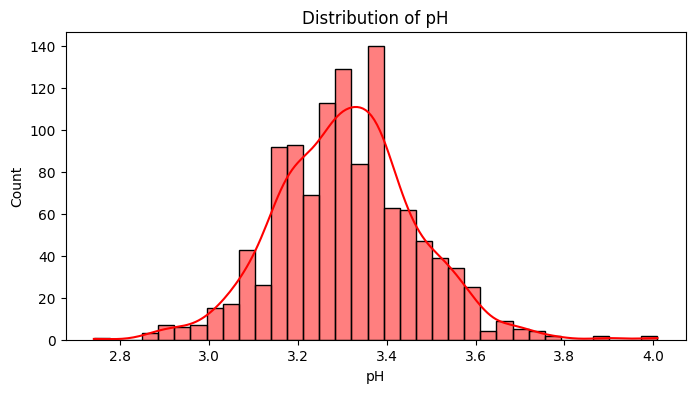

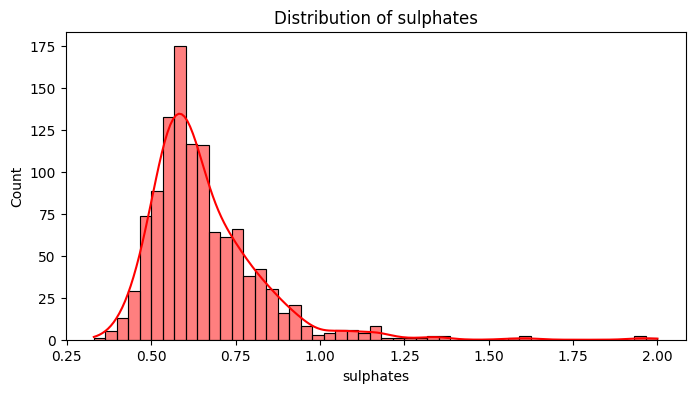

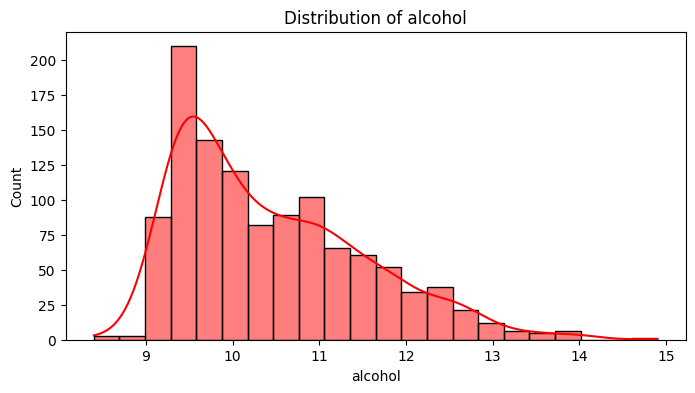

In [10]:
for col in df.columns[:-2]:  # Exclude 'quality' and 'Id'
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True,color='Red')
    plt.title(f"Distribution of {col}")
    plt.show()

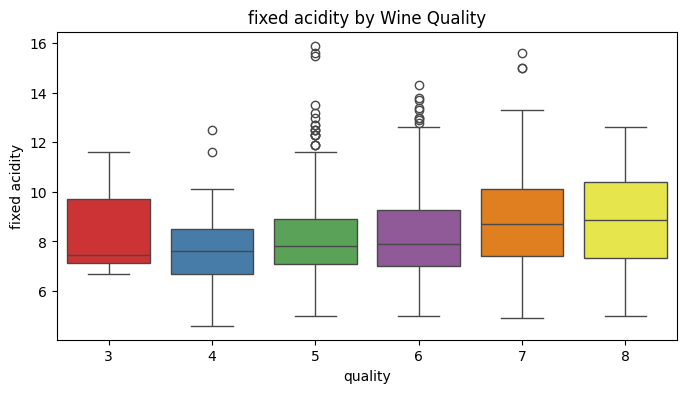

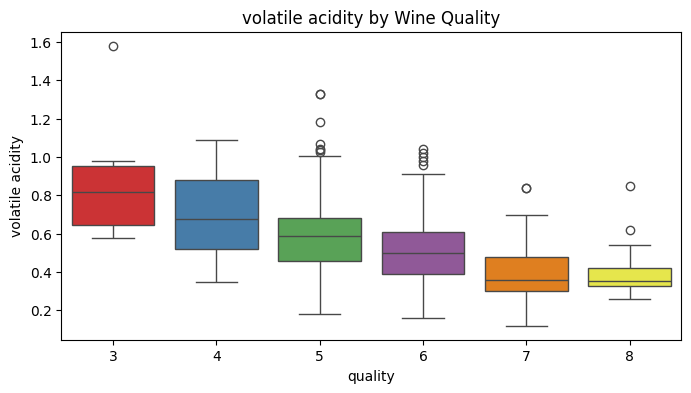

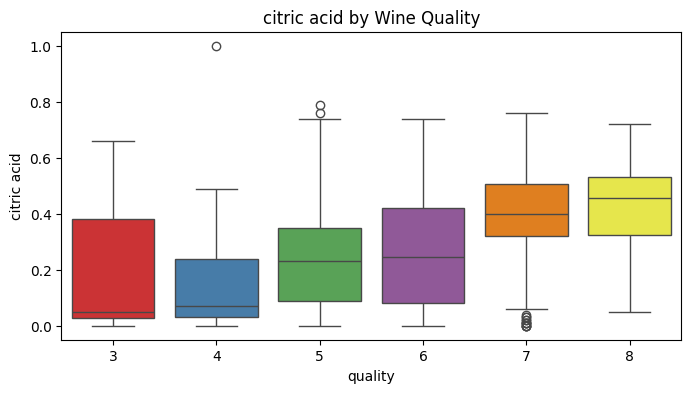

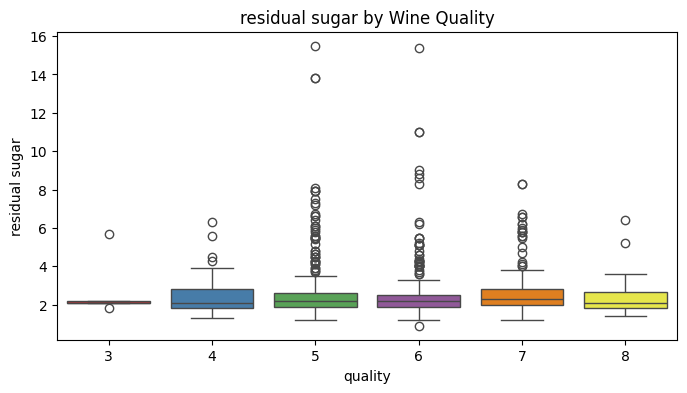

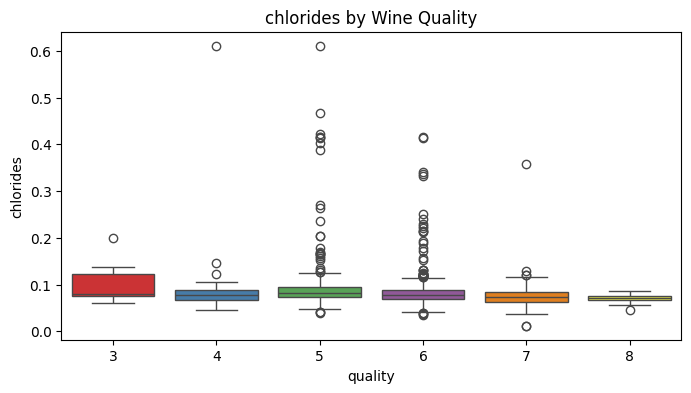

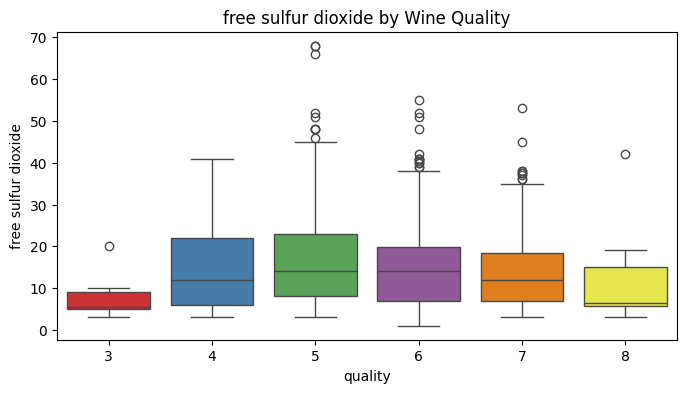

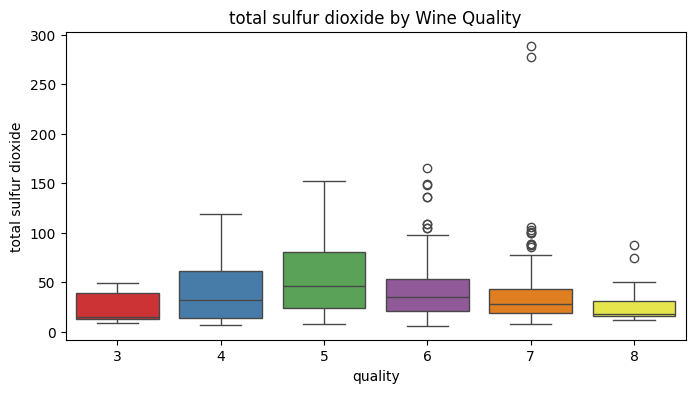

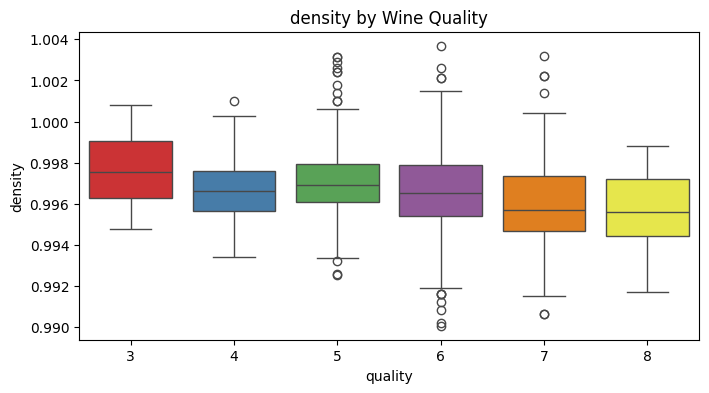

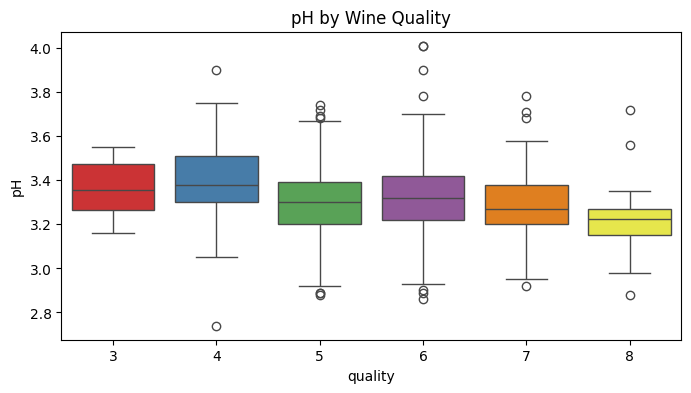

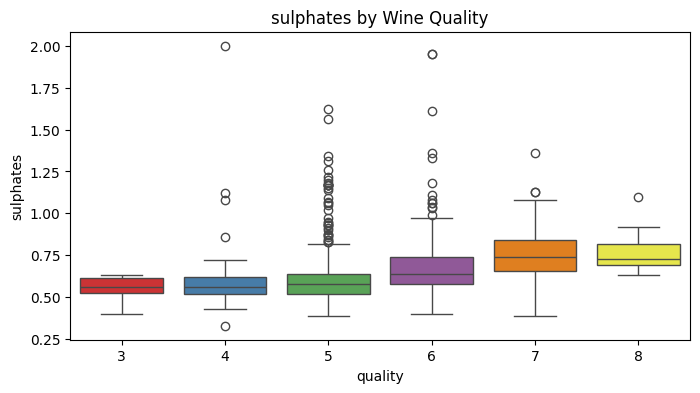

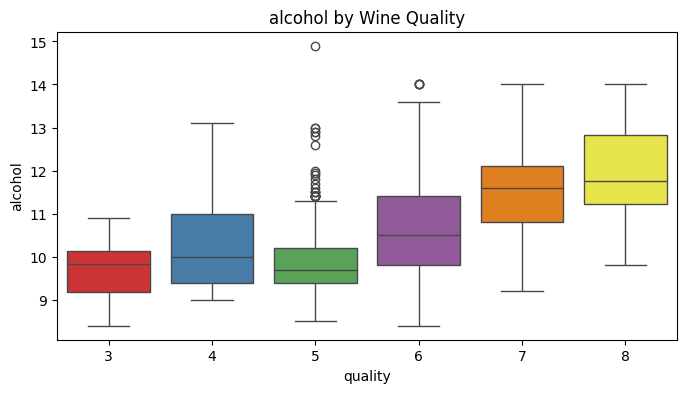

In [11]:
for col in df.columns[:-2]:  # Exclude 'quality' and 'Id'
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='quality', y=col, data=df,palette='Set1')
    plt.title(f"{col} by Wine Quality")
    plt.show()

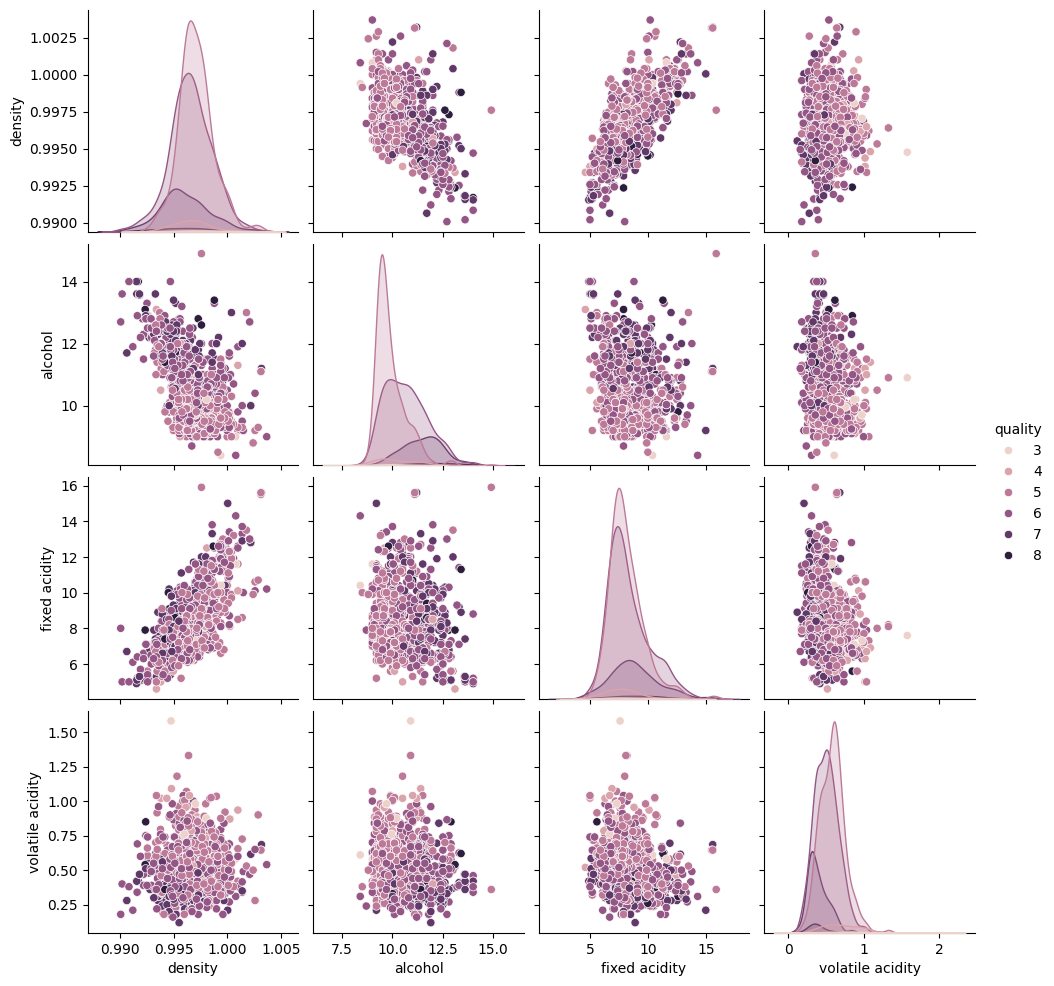

In [12]:
sns.pairplot(df, vars=['density', 'alcohol', 'fixed acidity', 'volatile acidity'], hue='quality')
plt.show()

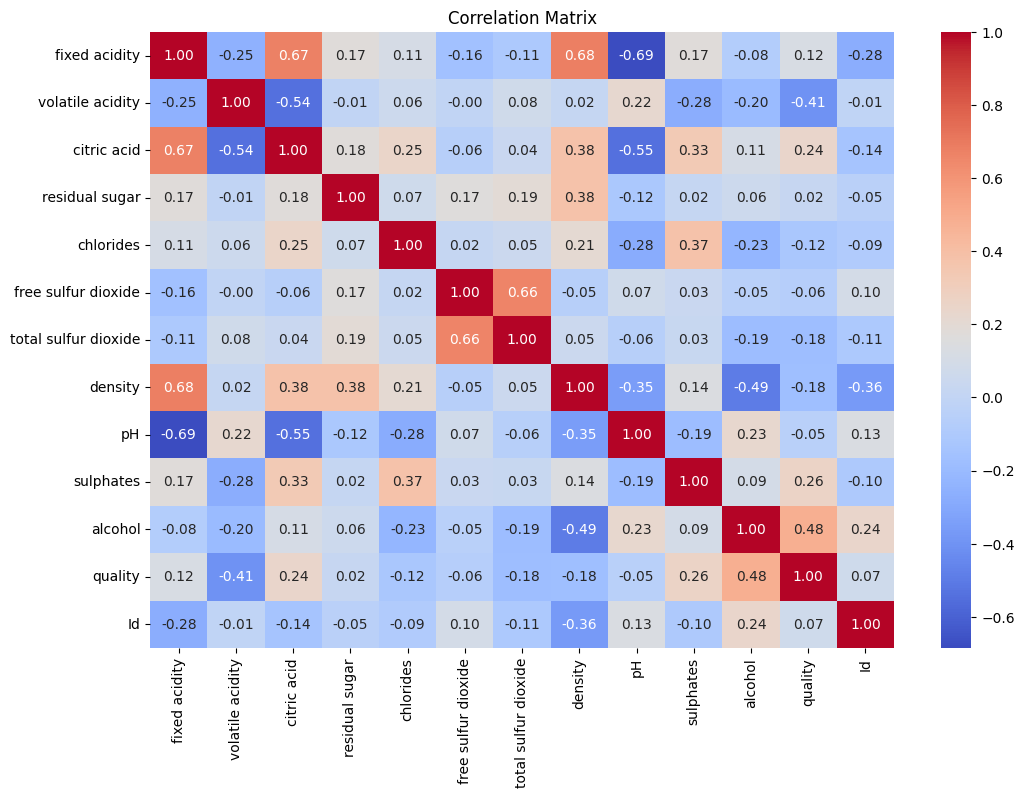

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

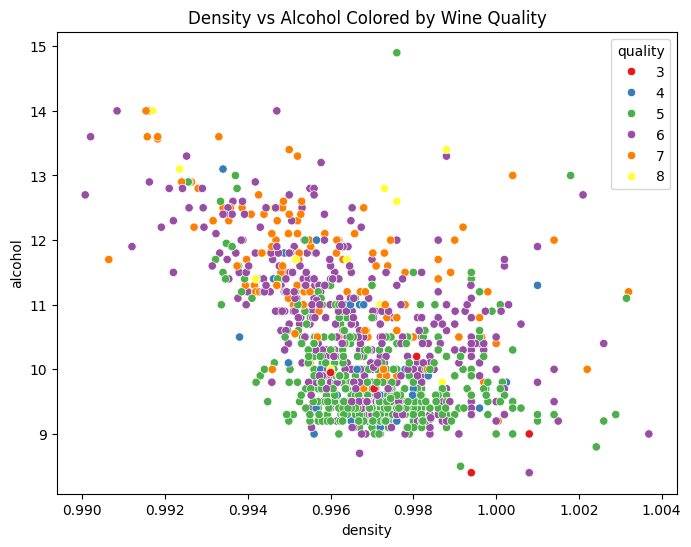

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='alcohol', hue='quality', data=df, palette='Set1')
plt.title("Density vs Alcohol Colored by Wine Quality")
plt.show()

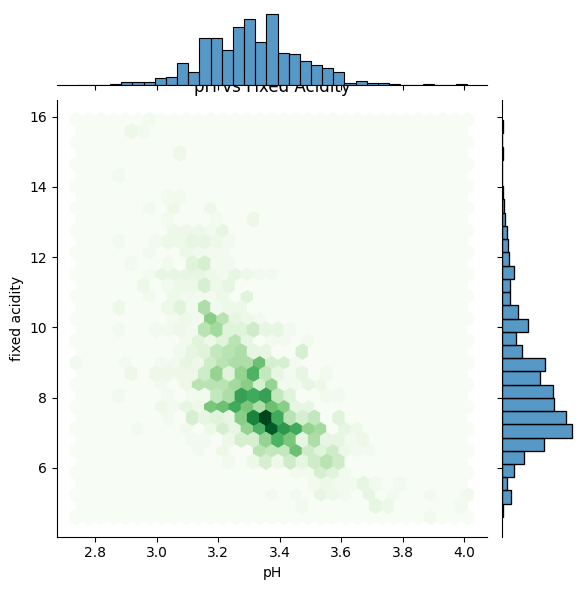

In [15]:
sns.jointplot(x='pH', y='fixed acidity', data=df, kind='hex', cmap='Greens')
plt.title("pH vs Fixed Acidity")
plt.show()

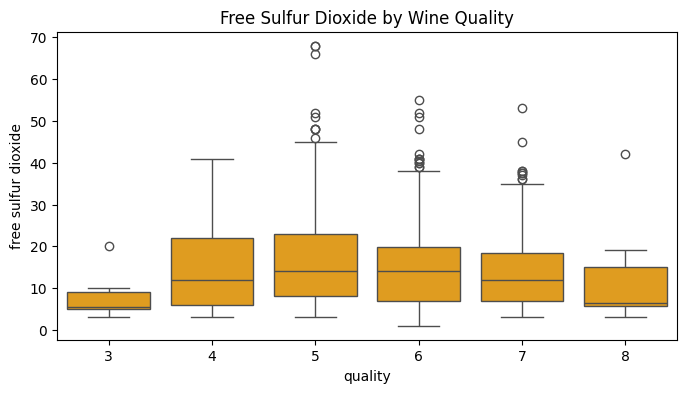

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='quality', y='free sulfur dioxide', data=df,color='Orange')
plt.title("Free Sulfur Dioxide by Wine Quality")
plt.show()

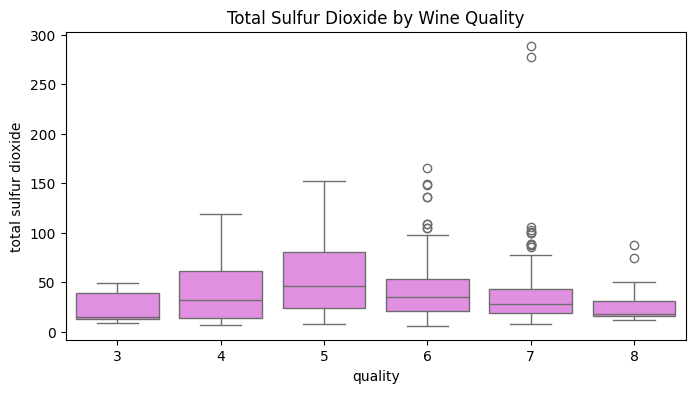

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='quality', y='total sulfur dioxide', data=df,color='Violet')
plt.title("Total Sulfur Dioxide by Wine Quality")
plt.show()

In [18]:
# Drop the Id column
df = df.drop(columns=['Id'])

# Define features (X) and target (y)
X = df.drop(columns=['quality'])  # Features
y = df['quality']  # Target variable

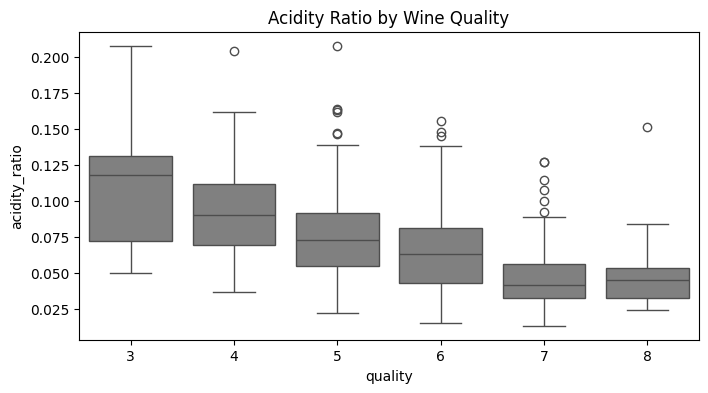

In [19]:
df['acidity_ratio'] = df['volatile acidity'] / df['fixed acidity']
plt.figure(figsize=(8, 4))
sns.boxplot(x='quality', y='acidity_ratio', data=df,color='Gray')
plt.title("Acidity Ratio by Wine Quality")
plt.show()

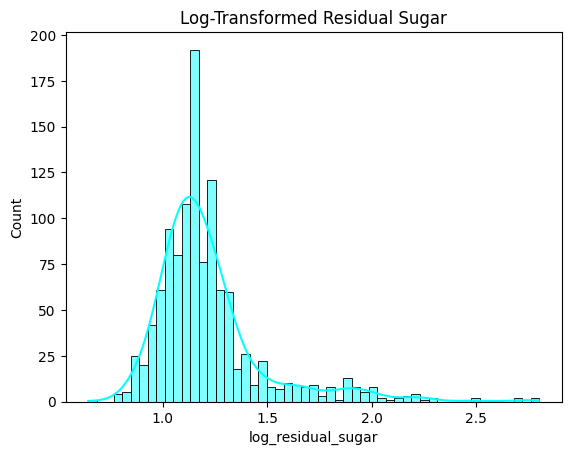

In [20]:
df['log_residual_sugar'] = np.log1p(df['residual sugar'])
sns.histplot(df['log_residual_sugar'], kde=True,color='Cyan')
plt.title("Log-Transformed Residual Sugar")
plt.show()

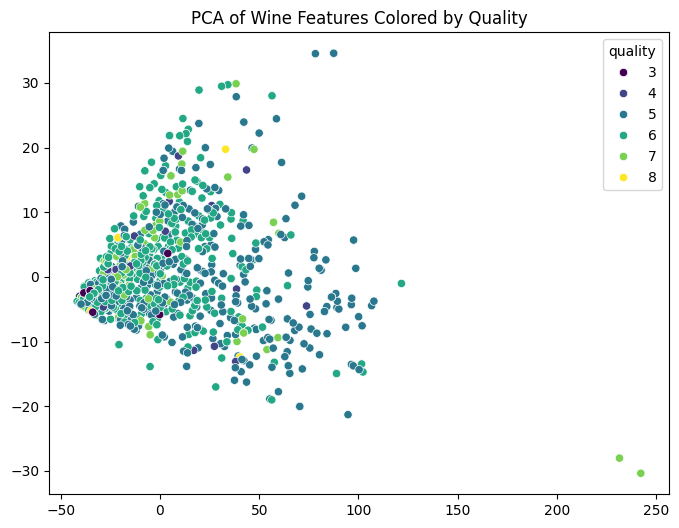

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(['quality'], axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['quality'], palette='viridis')
plt.title("PCA of Wine Features Colored by Quality")
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
# Model Training and Evaluation
models = {
    "Random Forest": RandomForestClassifier(),
    "SGD Classifier": SGDClassifier(),
    "SVC": SVC()
}

Random Forest - Accuracy: 0.6768558951965066
Random Forest - Precision: 0.6520429563174378
Random Forest - Recall: 0.6768558951965066
Random Forest - F1 Score: 0.6636658987171331
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.77      0.73        96
           6       0.65      0.64      0.64        99
           7       0.69      0.69      0.69        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.41      0.42      0.41       229
weighted avg       0.65      0.68      0.66       229



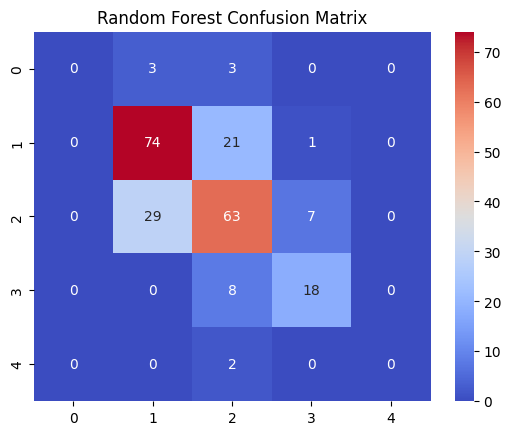

SGD Classifier - Accuracy: 0.5982532751091703
SGD Classifier - Precision: 0.5632992550732084
SGD Classifier - Recall: 0.5982532751091703
SGD Classifier - F1 Score: 0.5530125797003583
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.63      0.82      0.71        96
           6       0.56      0.58      0.57        99
           7       0.50      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.60       229
   macro avg       0.34      0.29      0.27       229
weighted avg       0.56      0.60      0.55       229



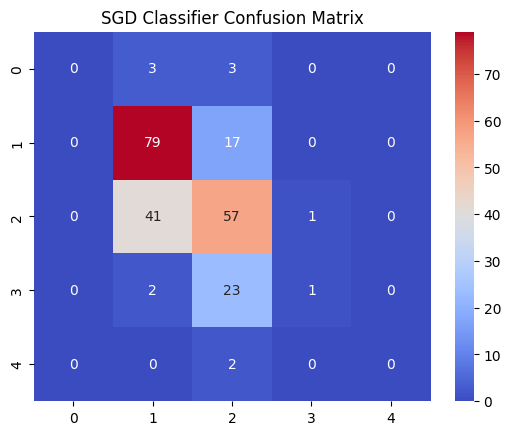

SVC - Accuracy: 0.6375545851528385
SVC - Precision: 0.6114597334045156
SVC - Recall: 0.6375545851528385
SVC - F1 Score: 0.6176733219517373
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229



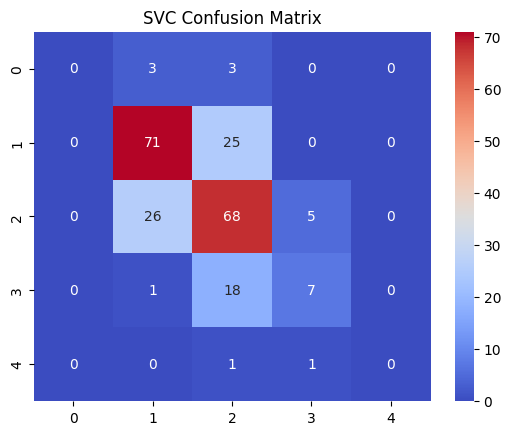

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} - Precision: {precision_score(y_test, y_pred, average = 'weighted')}")
    print(f"{name} - Recall: {recall_score(y_test, y_pred, average = 'weighted')}")
    print(f"{name} - F1 Score: {f1_score(y_test, y_pred, average = 'weighted')}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [26]:
from sklearn.model_selection import cross_val_score

# Cross-validation (5-fold) for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Random Forest Cross-Validation Accuracy: 0.5696 ± 0.0297
SGD Classifier Cross-Validation Accuracy: 0.4899 ± 0.0547
SVC Cross-Validation Accuracy: 0.6002 ± 0.0353


In [27]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation accuracy for Random Forest:", rf_grid_search.best_score_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.6563862367141056


In [28]:
sgd_params = {
    'loss': ['hinge', 'log'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01]
}

sgd_grid_search = GridSearchCV(SGDClassifier(), sgd_params, cv=5, scoring='accuracy')
sgd_grid_search.fit(X_train, y_train)

print("Best parameters for SGD:", sgd_grid_search.best_params_)
print("Best cross-validation accuracy for SGD:", sgd_grid_search.best_score_)

Best parameters for SGD: {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet'}
Best cross-validation accuracy for SGD: 0.5689545427250345


In [29]:
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svc_grid_search = GridSearchCV(SVC(), svc_params, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train, y_train)

print("Best parameters for SVC:", svc_grid_search.best_params_)
print("Best cross-validation accuracy for SVC:", svc_grid_search.best_score_)

Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy for SVC: 0.6170059448747974


In [30]:
# Retrieve feature importances from the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_
feature_importances = best_rf_model.feature_importances_

In [31]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

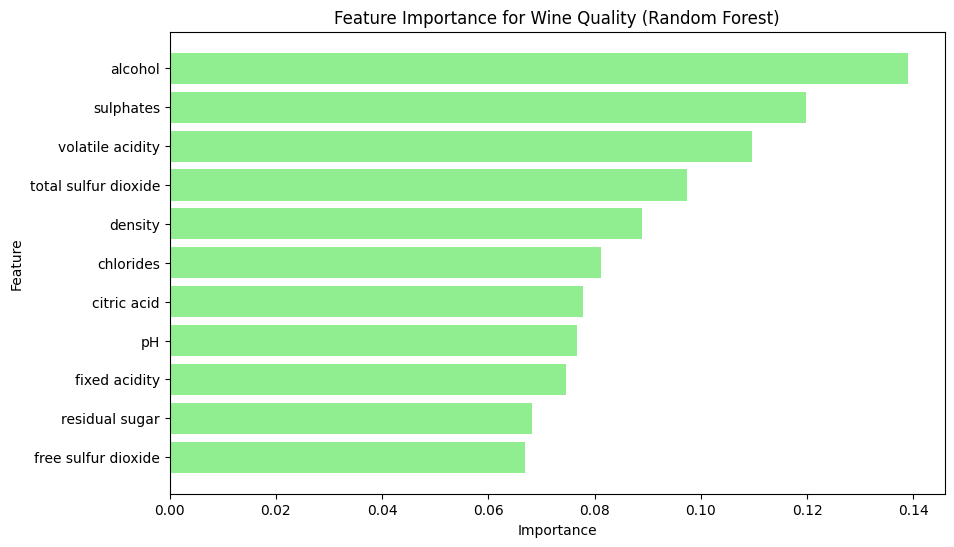

In [32]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'],color='LightGreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Wine Quality (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

<Figure size 1400x800 with 0 Axes>

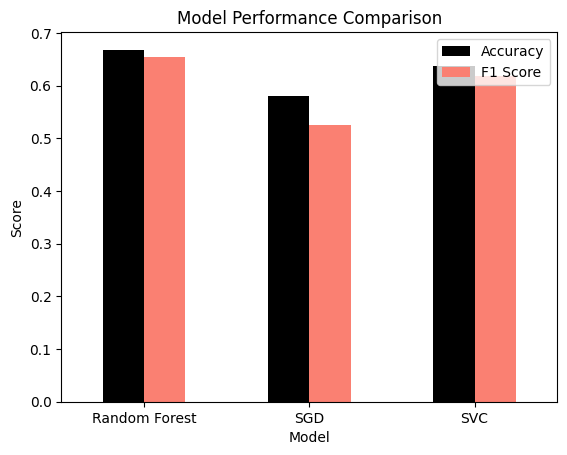

In [33]:
# Store metrics in a dictionary for comparison
model_metrics = {
    'Model': ['Random Forest', 'SGD', 'SVC'],
    'Accuracy': [accuracy_score(y_test, rf_grid_search.predict(X_test)),
                 accuracy_score(y_test, sgd_grid_search.predict(X_test)),
                 accuracy_score(y_test, svc_grid_search.predict(X_test))],
    'F1 Score': [f1_score(y_test, rf_grid_search.predict(X_test), average='weighted'),
                 f1_score(y_test, sgd_grid_search.predict(X_test), average='weighted'),
                 f1_score(y_test, svc_grid_search.predict(X_test), average='weighted')]
}

metrics_df = pd.DataFrame(model_metrics)

# Plot the metrics
plt.figure(figsize=(14, 8))
metrics_df.plot(x='Model', y=['Accuracy', 'F1 Score'], kind='bar', color=['Black', 'salmon'], rot=0)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend(loc='upper right')
plt.xticks(np.arange(len(metrics_df['Model'])), metrics_df['Model'])
plt.show()

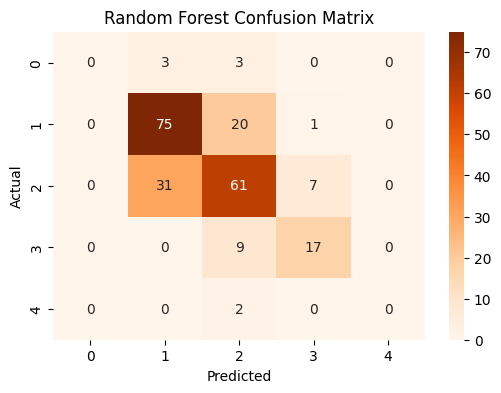

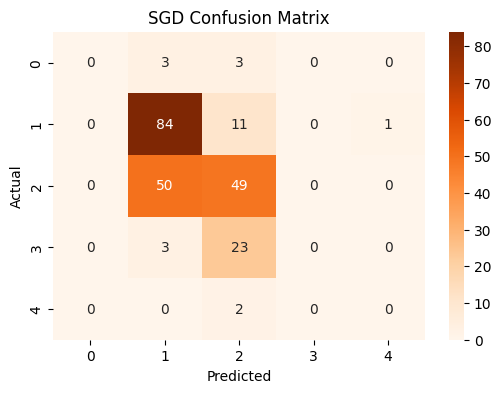

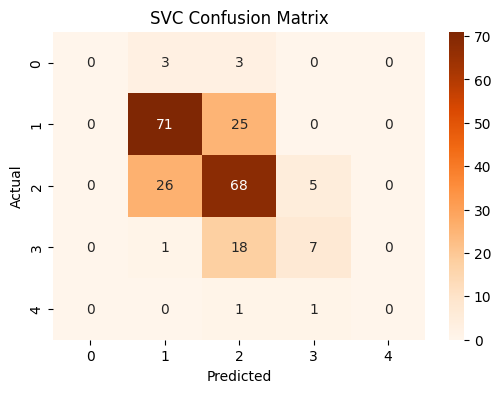

In [34]:
# Plot confusion matrix for each model
for name, model in zip(['Random Forest', 'SGD', 'SVC'], [best_rf_model, sgd_grid_search.best_estimator_, svc_grid_search.best_estimator_]):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# For multiclass setup, you could apply OneVsRest strategy (example only if binary/multiclass ROC is needed)
y_bin = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])  # Adjust classes as necessary
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)

In [36]:
# Train OneVsRest classifier
ovr_rf = OneVsRestClassifier(best_rf_model)
y_score = ovr_rf.fit(X_train_bin, y_train_bin).predict_proba(X_test_bin)

In [37]:
# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

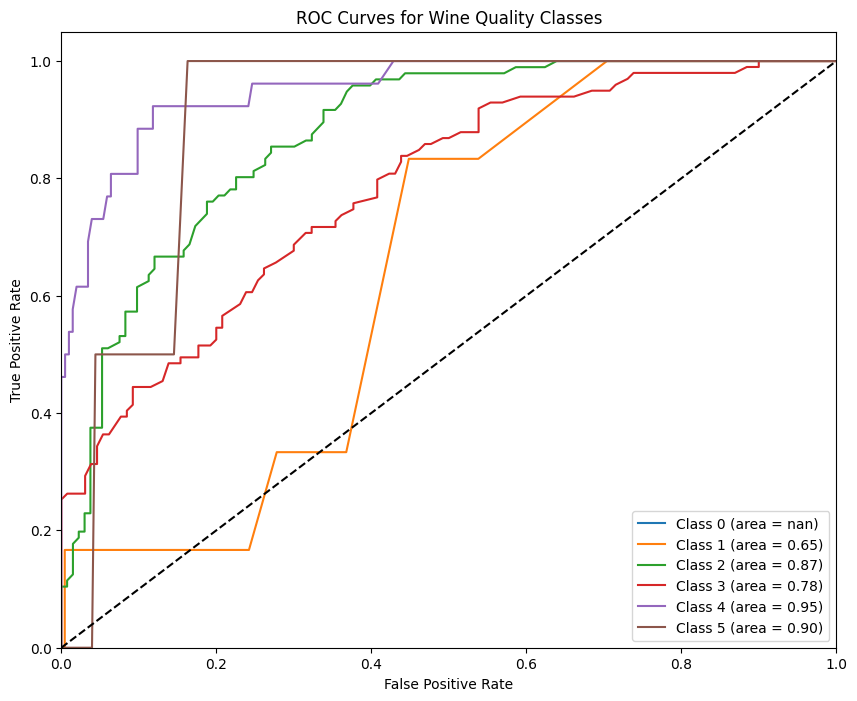

In [38]:
# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(y_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Wine Quality Classes')
plt.legend(loc="lower right")
plt.show()
